<a href="https://colab.research.google.com/github/Lucy-Moctezuma/Machine-Learning-Projects-for-SFSU/blob/main/E.%20Coli%20Machine%20Learning%20Project/5_Neural_Network_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network**

![NN.png](https://drive.google.com/uc?export=view&id=1PpXS3nZk1gFS1RBbWlbNbnxHDFNbomRQ)

## ***Objectives for this Notebook***
- Introducing the importance of feature scaling and basic concepts behind Neural Networks used in the context of tabular data.
- Create functions to implement Neural Networks into Moragadivand's dataset.

**Neural Networks**  is a method within Machine Learning (ML) in which the computer learns to accomplish a task through trial and error by analyzing training samples. Neural networks are loosely inspired by how biological neurons are connected and signal each other. It's important to know that there are many kinds of neural networks that can be used for different kinds of data (images, sounds, etc) and there are specific names for different Neural network architectures (Convolutional Neural Networks, Recurrent Neural Networks, etc.). We will however focus only with basic Neural Network for tabular data (i.e. dataframes).

### **Parts of a Neural Network**

All neural networks despite of their function and kind of data they deal with have in essence these following parts.

![neuralnet.png](https://drive.google.com/uc?export=view&id=1df7Dq1LS9QTFOdLuvOWb1Et6IiMIq4FK)

**1) Input layer:** is the layer that we use to feed our initial data. These can be data tables, text, images, etc. In our case we would be working with a data table, and this layer will contain the same amount of nodes as there are feature columns in our dataset.

**2) Hidden layers:** are the ones that will further process the information they receive from the input layer. In the example above we have 2 hidden layers but the amount of layers can vary depending on the task.

**3) Output layer:** is the final layer where we get our predictions, because we are dealing with classification of just 2 classes we will have 2 nodes in this layer.

**4) Nodes:** are the the components of each layer and it represents a center where computation and mathematical equations determine what information is passed to the next layer. Nodes are connected to the following layers differently.

**5) Weights:** are values that are meant to show the strenght of the relationship between each node. The general idea is that a neural network starts with a random set of weights and then during training, the weights get updated in a trial and error fashion until it finds the best combination of weights that will yield the highest performing model.
**Notice that in the image above, every black arrow has its own weight**


### **1) Importing Packages needed**
For Neural Networks we will introduce some new python packages: **Keras** and **Tensorflow**. Both of these are widely used within the Python community to construct Neural Networks. In addition we will install the package **Scikeras**, which is a wrapper that let us hypertunne our NN model using GridSearch.

**NOTE:** When running the code below do not worry if you encounter an error using pip install, this is just due to package compatibilities. But scikeras resolves this automatically. You can run it again and you will see that the installation is done correctly.

In [ ]:
# Please install the following package first
!pip install scikeras

In [ ]:
# Data manipulation imports for ML
import pandas as pd
import numpy as np
import random

# Import packages for Neural Networks model and hyperparameter tunning
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedGroupKFold, KFold
import keras as keras
import tensorflow as tf
import scikeras
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

# Imports for model evaluation
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, make_scorer, accuracy_score, recall_score, precision_score
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)


# Imports for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import plot_model

print("Tensorflow version:",tf.__version__)
print("Keras version:",keras.__version__)
print("Scikeras version:",scikeras.__version__)

# Imports for file management
import os
from google.colab import drive
drive.mount('/content/drive')

Tensorflow version: 2.15.0
Keras version: 3.3.3
Scikeras version: 0.13.0
Mounted at /content/drive


Because this tutorial uses a combination of 3 different packages for creating and evaluating the models, we have to make sure that the versions are correct. In this case make sure you have the following versions:
- Tensorflow version: 2.15
- Keras version: 3.3.3
- Scikeras version: 0.13.0

**SEED SETTING**

There is a lot of randomnes that contribute to Neural Networks results. Nevertheless, a good Neural Network Model should not depend on the seed but the data used and the architechture, given this, metrics should not be extremely affected by seed setting. Therefore this randomness is actually desired and not a problem.

However, for the sake of this learning tutorial and for reproducibility of these results we will be fixing **seed_value: 42** for all the background computations. Below we list the different sources of randomnes:

- Within Environment
- Within Python language
- Within specific packages (numpy, tensorflow)
- When choosing splits for training and testing data
- Within Learning Algorythm:
  - Neural network sets random weights at the beggining of training
  - Some special layers such as Dropout layers introduce randomness

The code below will **seed_value: 42** globally for the environment, the **python** language and for 2 packages (**numpy and tensorflow**). We will also quickly indicate where we have set other seeds. Everytime a seed is set you will see `seed_value` within the code of this notebook.



In [ ]:
# Set a seed value
seed_value= 42

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)

### **2) Loading CSV file and creating dataframes for each antibiotic**

As in all previous ML model Notebooks, We will load our original dataframe, which contains all antibiotic drug labels and all features (GY) and then we will be creating a dataframe for each antibiotic using different functions.

#### **a) Loading CSV created from previous notebook**

**NOTE:** Code below is the same as in previous notebook

In [ ]:
# Loads csv file as a dataframe
filepath = '/content/drive/My Drive/EColi_ML_CSV_files/'

# reads csv file as a dataframe
All_Drugs_df = pd.read_csv(filepath+"EColi_Merged_df.csv", na_values="NaN")
All_Drugs_df.head()

<ipython-input-5-c2555a6b2d8b>:5: DtypeWarning: Columns (5,6,7,8,10,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  All_Drugs_df = pd.read_csv(filepath+"EColi_Merged_df.csv", na_values="NaN")


,MLST,Isolate,Year,CTZ,CTX,AMP,AMX,AMC,TZP,CXM,...,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
0,ST68,11679_6#21,2001.0,S,NaN,NaN,S,S,S,R,...,0,0,0,0,0,0,0,0,0,0
1,ST652,11658_6#85,2005.0,S,S,NaN,S,S,S,S,...,0,0,0,0,0,0,0,0,0,0
2,ST95,11657_6#45,2005.0,S,S,NaN,R,R,R,S,...,0,0,0,0,0,0,0,0,0,0
3,ST73,11658_4#53,2005.0,S,S,NaN,R,S,S,S,...,0,0,0,0,0,0,0,0,0,0
4,ST73,11658_4#54,2005.0,S,S,NaN,R,S,S,S,...,0,0,0,0,0,0,0,0,0,0


#### **b) Changing "R" to 0 and "S" to 1  for Neural Network Model**
Neural Networks work using numeric values, therefore we will be converting all our target labels into floats. The last line of code shows the recoded version of all the labels for the antibiotic drugs.

In [ ]:
# creating a list of antibiotic names
drug_list = All_Drugs_df.iloc[:,3:15].columns

# converts all S values into 1 for each antibiotic
for drug in drug_list:
  All_Drugs_df.loc[All_Drugs_df[drug] == "S", drug] = 1.0

# converts all R values into 0 for each antibiotic
for drug in drug_list:
  All_Drugs_df.loc[All_Drugs_df[drug] == "R", drug] = 0.0

# Checking at how S and R classes were recoded
All_Drugs_df.head()

,MLST,Isolate,Year,CTZ,CTX,AMP,AMX,AMC,TZP,CXM,...,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
0,ST68,11679_6#21,2001.0,1.0,NaN,NaN,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,ST652,11658_6#85,2005.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,ST95,11657_6#45,2005.0,1.0,1.0,NaN,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,ST73,11658_4#53,2005.0,1.0,1.0,NaN,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,ST73,11658_4#54,2005.0,1.0,1.0,NaN,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


### **3) Separating each Drug Dataframe into 4 sections : Training (features and labels) and Testing (features and labels)**

**NOTE:** Code below is the same as in previous notebook

**a) Creating Testing and Training datasets for each antibiotic drug**

 *Seed value was used in the train_test_split() function, to split the data consistentently, that is, the observations chosen to be part of the training chunk will be consistent regardless of how many times the code is ran.*



In [ ]:
# Separating each dataframe into Labels and Features for training and testing data.
# Our function uses the handy train_test_split() function.

def Split_train_test(drug):
  #here we make a list of the columns we want to keep: the column for the isolate, the column for the drug we are interested in and all features (starting from column 13).
  df_list = [All_Drugs_df[["MLST","Isolate",drug,"Year"]], All_Drugs_df.iloc[:,15:]]

  #here we create a data frame with just the columns we wanted to keep.
  Drug_df = pd.concat(df_list, axis=1)

  #here we drop all rows with missing data
  Drug_df = Drug_df.dropna()

  # Creating a dictionary to store each antibiotic datasets
  Train_test_dic = {}

  # Defining the label columns
  labels = Drug_df[drug]

  # Defining features columns
  features = Drug_df.drop(columns=[drug])

  # Separating training (features and labels) and testing (features and labels) datasets
  features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=seed_value, stratify=labels)

  # storing each data chunk in a dictionary
  Train_test_dic['labels_train'] = labels_train
  Train_test_dic['features_train'] = features_train
  Train_test_dic['labels_test'] = labels_test
  Train_test_dic['features_test'] = features_test

  return Train_test_dic

In [ ]:
# Implementing the function Split_train_test() for AMC example
AMX_Train_test_dic = Split_train_test("AMX")

# checking the shape of each dataframe or series stored in the dictionary created for drug AMC
print("AMX")
for k, df in AMX_Train_test_dic.items():
  print(k, df.shape)
  # counting how many of the labels have susceptible versus resistant ones
  if k.startswith("labels"):
    print(df.value_counts())

AMX
labels_train (875,)
AMX
0.0    529
1.0    346
Name: count, dtype: int64
features_train (875, 17201)
labels_test (219,)
AMX
0.0    133
1.0     86
Name: count, dtype: int64
features_test (219, 17201)


Remember that our target values have been recoded. **0.0 is Resistance (R)** and **1.0 is Susceptible (S)**. And in our implementation we used the antibiotic AMX. The total number of training observations is 875.

### **4) Creating different combination of features before training**

**NOTE:** Similar Code to prior notebooks


In [ ]:
# making a list of combinations of data sources we would like to test in our ML models
combo_list = ['Y', 'G', 'GY']

# making a function that creates different feature combinations of the predictor features
def combo_feat(features_df, drug, combo):

  # Isolating Year as a feature and
  year_filter = [col for col in features_df if col.startswith("Year")]
  year_feat = features_df[year_filter]

  # creating Gene precence column filters for features_df
  gene_presc_filter = [col for col in features_df.columns if col not in year_filter and col != "Isolate"]
  gene_presc_feat = features_df[gene_presc_filter]

  if combo == 'Y':
    df_list = [features_df[['MLST','Isolate']], year_feat]
    Y_feat_df_t = pd.concat(df_list, axis=1)
    Y_feat_df_t = Y_feat_df_t.drop(columns=['Isolate'])
    return Y_feat_df_t

  if combo == 'G':
    df_list = [features_df['Isolate'], gene_presc_feat]
    G_feat_df = pd.concat(df_list, axis=1)
    G_feat_df = G_feat_df.drop(columns=['Isolate'])
    return G_feat_df

  if combo == 'GY':
    df_list = [features_df['Isolate'], year_feat, gene_presc_feat]
    GY_feat_df_t = pd.concat(df_list, axis=1)
    GY_feat_df_t = GY_feat_df_t.drop(columns=['Isolate'])
    return GY_feat_df_t

In [ ]:
# Implementing combo_feat() function created for training data
AMX_GY_train_df = combo_feat(AMX_Train_test_dic['features_train'],"AMX","GY")

# Now each feature combination has its own dataframe
AMX_GY_train_df.head()

,Year,MLST,yeiU,yhhS,ybaE,eutR,ibrB,ytfP,aslB,narQ,...,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
662,2002.0,ST641,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
75,2005.0,ST73,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
196,2006.0,ST405,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
540,2009.0,ST415,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
127,2006.0,ST131,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


For Neural networks, we need to convert our dataframe to an array. Passing a dataframe would be lower the performance dramatically. Therefore we will actually convert our features later when we actually pass them into our NN model.

In [ ]:
# looking at the shape of the array we can see that it is the same as the dataframe
AMX_GY_train_df.shape

(875, 17200)

### **5) Creating Neural Network model and training it per feature combination**



The general structure of how a Neural network is created is fairly loose, because it depends on the kind of data we are fitting, how complex the pattern you are trying to capture, etc. This tutorial focuses on structured data specifically and we used the NN structure created by **"Moradigavand"**. Know that you can change these parameters and test what works as it is part of *hyperparameter tunning*, which will be dicussed further in part 6 of this notebook.  

Shown below in the pseudo code to create a neural network in general, we will also briefly define some vocabulary used in our code and specify what choices were made for each hyperparameter:

<font color="grey">`Model.add(Layertype(#_output_weights, activation= 'specific function', input_shape=#_input_weights)`

**A) For Neural Network *Architechture*:**

- **Dense:** This is a kind of layer, where each node from a dense layer receives conexions from all the previous nodes, for this reason they are often called **"fully connected"**. For our NN:
  - 1 input dense layer of neurons that output 200 weights.
  - 1 intermediate dense layer of neurons that outputs 100 weights.

- **Dropout:** This is a special type of layer with the sole function to block a percentage of weights that pass from one layer to the next. A Dropout rate assigns a percentage of randomly selected neurons in a layer to become inactive, meaning their contribution in the forward pass is not taken into account and therefore the weights in the backward pass towards these dropout neurons do not get updated. This is considered to be a **Regularization method**, meaning it is done so that our model doesn't follow the training data too closely and is able to generalize better for unseen data. For our NN:
  - 1 dropout layer between input and hidden layer with 0.8 weights dropped.
  - 1 dropout layer between hidden and output layer with 0.8 weights dropped.

- **Activation function:** is a parameter we can pass for some types of layers, it is essentially a function that computes the output for a layer. For example, for Dense layers we have ["Relu"](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)), whereas for dropout layers we dont have one, as they don't need to compute an output, they just block outputs from the layer before from going to the next layer, by converting some of these to 0. For our NN:
  - Activation function on input layer is "relu"
  - Activation function on hidden layer is "relu"
  - Activation function on output layer is "softmax"
***

**B) For Neural Network *Training behavior*:**

The function created allows you to create the model (Network Architecture) and compile it (Training Behavior)

<font color="grey">`EarlyStopping(patience=# training epochs)`

- **Early Stopping:** is a parameter that essentially stops the training based on the maximum number of epochs accepted before stopping the training if no improvement is seen. For our NN training behavior:
  - We set a patience of 5 epochs.

<font color="grey">`Model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=lr) ,loss= 'binary_crossentropy', metrics=['accuracy','recall','precision'])`

- **Optimizer**: is the algorithm used to adjust the weights based on training rates. For our NN training behavior:
  - Our optimzer was "Adam"

- **Learning rate**: is a value between 0 and 1, that determines basically how fast our model will try to learn. The higher the learning rate, the less number of epochs (training cycles) is required. This is the most important parameter to tune in a Neural Network. Too large and it will converge too quickly and provide a suboptimal result, too small and it will get stuck.For our NN training behavior:
  - Our base learning rate is 0.001

- **Loss function**: there are many loss functions we can use depending on the type of data and task. A loss function is essentially a method used to evaluate how well our algorithm models our training data. Our objective is to minimize it since its essentially our errors. For our NN training behavior:    
 - *binary_crossentropy* (a mathematical function that measures the difference between predicted probabilities and actual labels in classification task with only 2 classes)

- **Metrics**: this is just a measurement we can look at in order to judge the performance of the model while training, and as our loss function is being optimized. In our case we use actually a Weighted Metrics, since we have class imbalance. For our NN training behavior:
  -  We chose to use Accuracy, precision and recall. For the last 2 metrics, they are the average of the 2 classes (R & S).

The function we are creating allows us to just stop here and just create our model or we can actually also control how we feed the data when training as well.

<font color="grey">`Model.fit(features, to_categorical(labels), validation_split = percent of training data used for validation, callbacks= [early_stopping_monitor],epochs=# of training cycles, batch_size= # observations fed at a time))`

A Neural Network, is trained in 2 general stages:

**1) Feedforward**: First the observations start on the input layer go through all the hidden layers and then it produces an initial prediction in the output layer.

**2) Backpropagation**: An error is calculated between our actual training labels and the output we got from the Feedforward process. It then adjusts the weights from output layer back to input layer in order to minimize the errors.
***

**Epoch:** Is one cycle of training where the entire dataset goes through a Feedforward process and a Backpropagation one.
  - We have set a total of 10 epochs.

**Batch:** Because feeding the entire dataset might be computationally expensive, it is a common practice to feed our neural network data in batches.
  - We have chosen a batch size of 128.

**Validation Data:** Is a chunk of the training data that is reserved to check if our model is generalizing well to all the training data. This is different from the testing data, because it is being used during model training.
  - We set validation to be 20% or 0.02

**NOTES:** Seed_values were set here for the initial weights prior to training and for every Dropout layer in the Neural Network

In [ ]:
# creating Neural Network model function
def run_NN(feat_train_df, lab_train, drug, combo,fit = True, view_training = True, view_epoch=0, lr=0.0001, rate=0.8):
  print(drug +" Training combo: "+ combo)

  # Reweighting classes due to imbalanced dataset
  class_labels = np.unique(lab_train)
  reweight = compute_class_weight(class_weight='balanced', classes=class_labels, y=lab_train)

  # Converting features into arrays and rescaling them
  feat = feat_train_df.drop(columns=['MLST'])
  scaler = MinMaxScaler()
  feat_array_t = scaler.fit_transform(feat)
  # Choose the type of Neural Network you want create
  NN = Sequential()
  # Adding the first input layer.
  NN.add(Dense(200,activation='relu'))
  # Adding the dropout layer for the first layer.
  NN.add(Dropout(rate, seed=seed_value))
  # Create hidden layers
  NN.add(Dense(100 ,activation='relu'))
  # For each of the hidden layers also create dropout
  NN.add(Dropout(rate, seed=seed_value))
  # Create the output layer that consist only on 1 node predicting probabilities with a threshold of 0.5
  NN.add(Dense(1, activation = 'sigmoid', kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value)))
  # Additional parameters for training (Early stopping)
  early_stopping_monitor= EarlyStopping(patience=10)
  # Compiling model created
  NN.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=lr) ,loss= 'binary_crossentropy', weighted_metrics=['accuracy'])
  if fit == True:
    # Training with the neural network created
    NN_history = NN.fit(x=feat_array_t, y=lab_train.to_numpy(dtype=float) , validation_split=0.2, callbacks= [early_stopping_monitor], epochs=10, batch_size=128, class_weight=dict(enumerate(reweight)), verbose=view_epoch)
    # visualizing each training
    if view_training == True:
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.suptitle('Training History')
      print(NN_history.history.keys())
      ax1.plot(NN_history.history['accuracy'])
      ax1.plot(NN_history.history['val_accuracy'])
      ax1.set_title('model accuracy')
      ax1.set(ylabel='accuracy', xlabel='epochs')

      ax2.plot(NN_history.history['loss'])
      ax2.plot(NN_history.history['val_loss'])
      ax2.set_title('model loss')
      ax2.set(ylabel='loss', xlabel='epochs')
      ax2.legend(['train', 'validation'], loc='best')
      fig.tight_layout()
      filepath='/content/drive/My Drive/EColi_ML_Plots/'
      plt.savefig(filepath + 'NN_' + drug + '_' + combo + '_' + 'training_history.jpg',dpi=400, bbox_inches="tight")
    return NN
  else:
    return NN

**NOTE:** The year has been rescaled using MaxMinScaler(), which rescales the year variable into the range from 0 to 1, in order to ease the model's learning. Rescaling is not always needed for all models but it is important for Neural Networks as it makes it easier to converge. There are other rescaling techniques you can read a short summary about them [here](https://www.kaggle.com/discussions/general/138076).

**C) Applying our function to an example:**

The total number of observations is 875 for AMX, and our batch size is 128. Therefore, in one epoch we will have 700 observations to fit as 20 percent is used as validation, so about 6.83 batches per epoch, which rounding up is 6 batches per epoch. Below we will implement our function for the antibiotic AMX and using only the features (G and Y).

AMX Training combo: GY
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.4885 - loss: 0.8764 - val_accuracy: 0.6229 - val_loss: 0.6789
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5013 - loss: 0.8343 - val_accuracy: 0.6229 - val_loss: 0.6688
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.5156 - loss: 0.7789 - val_accuracy: 0.6571 - val_loss: 0.6718
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.5333 - loss: 0.7272 - val_accuracy: 0.6514 - val_loss: 0.6713
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.4935 - loss: 0.7335 - val_accuracy: 0.6457 - val_loss: 0.6633
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.5712 - loss: 0.6882 - val_accuracy: 0.6514 - val_loss: 0.6548
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.5241 - loss: 0.7079 - val_accuracy: 0.6114 - val_loss: 0.6564
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.5475 - loss: 0.6902 - val_accuracy:

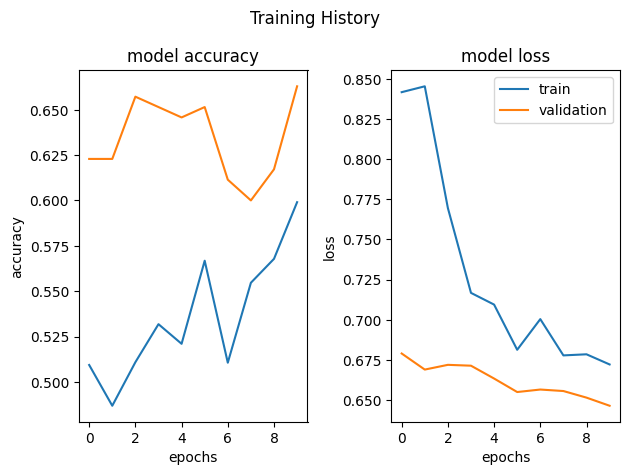

In [ ]:
# implementing run_NN() for specific drug feature combination dataframe
NN_AMX_GY_model = run_NN(AMX_GY_train_df, AMX_Train_test_dic['labels_train'], drug="AMX",combo="GY", view_epoch=1)

- In the graph above we can see that training and validation data have an upwards direction, meaning that we can see that accuracies for both training and validation are going up, meaning there is learning happening.
- We notice that the **training set** has a lower overall accuracy and a higher loss than the **validation set**, this is not usually the case, we would normally observed the reversed pattern. Because the validation is supposed to simulate unseen data it should have lower accuracies and higher loss, but because **Dropout layer** is implemented, regularization happens and this generalizability makes the validation metrics better. You can test this by lowering the dropout rates in a new session of this notebook, in doing so the lines will beggin to overlap and we will start to see more of a reversed pattern. The current dropout rate is at 0.8. Try changing the drop out rate to 0.2 to see what happens.

Below we can plot the model layers:

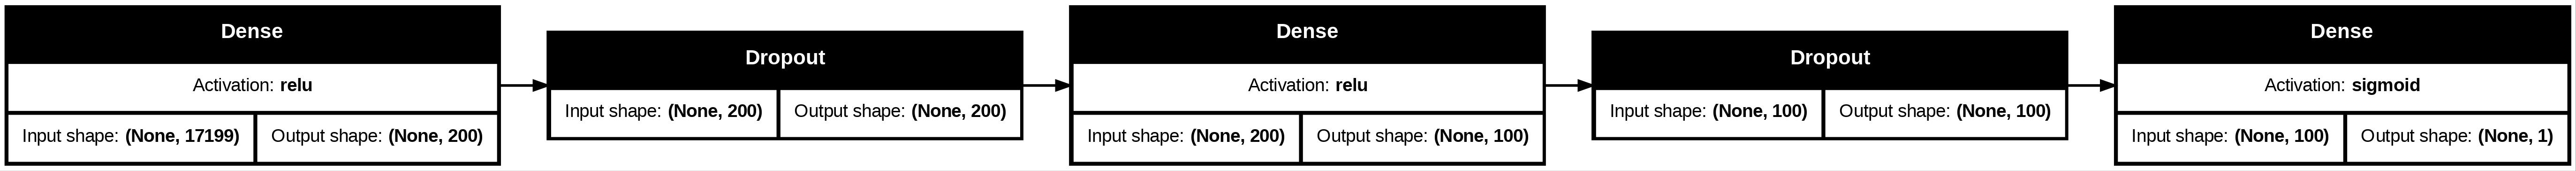

In [ ]:
# plotting the schematics of our model
plot_model(NN_AMX_GY_model, to_file='/content/drive/MyDrive/EColi_ML_Plots/NN_AMX_GY_model_Architechture.jpg', show_shapes=True, show_layer_activations=True, rankdir='LR')

We can see in the figure that the Input layers input contains 17199 nodes, this is because each node pertains to one feature. Remember that this model was trained with only G and Y dataset features. Our input layer nodes will change depending on out training data.

For each layer we can see the following information displayed:
- The name of the layer (example: dense)
- The type of neurons the layer contains (example: Dense, Dropout)
- The activation function the layer uses (example: softmax, relu)
- The amount of connections for the nodes it receives (input) - The amount of connections leaving the node (output). For dropout layers, we see that input and output shape are the same. However, when a weight gets filtered here, the amount passed is 0. Also, which neurons' weights become 0 changes every cycle of training, which is why everytime we run the code it will give you slightly different results.

Below in the model summary we can see that our model is quite large as it has more than 3 million parameters to train. Know that with that many parameters, the memory consumption will be higher.

In [ ]:
# Looking at model summary for more details
NN_AMX_GY_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 200)                 │       3,440,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,380,605 (39.60 MB)

 Trainable params: 3,460,201 (13.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,920,404 (26.40 MB)

### **6) Making predictions from Neural Network model**

After training our Neural network we are now ready to make predictions.

In [ ]:
# creating a function using the model created and trained and the feature combinations from testing data
def predict(NN_combo_Model, features_test):
  feat = features_test.drop(columns=['MLST'])
  scaler = MinMaxScaler()
  feat_t = scaler.fit_transform(feat)
  labels_pred = NN_combo_Model.predict(feat_t)
  labels_pred = np.where(labels_pred < 0.5, 0, 1).reshape((len(labels_pred),))
  return labels_pred

We will now use our **combo_feat()** function to choose the appropiate data feature combination for Testing. In the example below, we use the combination of features G and Y. We can also see the MLST column, but we will be ignoring it as it will not be used as a predictive feature.

In [ ]:
# Implementing combo_feat() function created for testing data
AMX_GY_test_df = combo_feat(AMX_Train_test_dic['features_test'],"AMX","GY")
AMX_GY_test_df.head()

,Year,MLST,yeiU,yhhS,ybaE,eutR,ibrB,ytfP,aslB,narQ,...,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
381,2008.0,ST73,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
793,2002.0,ST59,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
95,2005.0,ST38,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
0,2001.0,ST68,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
516,2009.0,ST405,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


Then we will implement our **predict()** function and checkout our predictions!

**Resistant (R=0)** and **Susceptible (S=1)**. We see below that our model has predicted mostly Resistant isolates.

In [ ]:
# Implementation of the predict() function using the feature combination "GY"
AMX_GY_labels_pred = predict(NN_AMX_GY_model,AMX_GY_test_df)

# observe how many predictions were made for each category "R"=0 and "S"=1
print("Labels predicted: ")
print(AMX_GY_labels_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Labels predicted: 
[0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1
 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


### **7) Evaluating our model using a confusion matrix and metrics**

Similarly to the previous notebook, we will evaluate our Neural Network model by using a Confusion Matrix and respective metrics. Below is a quick review of these, remember that there is one Accuracy score, but Recall and Presicion should have as many sets as classes our model its trained to predict:

|<font size=3>Metrics|<font size=3>General formula| <font size=3>Formula for 2 classes|
|--|:-:|:-:
|<font size=3>**Accuracy**|<font size=3>$\frac{Correctly \ classified}{All \ Predicted}$|<font size=3>$\frac{TP + TN}{TP + TN + FN + FP}$|
|<font size=3>**R Recall:**|<font size=3>$\frac{Correctly \ classified \ as \ R}{All \ Actual \ R}$|<font size=3>$\frac{TP}{TP + FN}$|
|<font size=3>**R Precision:**|<font size=3>$\frac{Correctly \ classified \ as \ R}{All \ Predicted \ R}$|<font size=3>$\frac{TP}{TP + FP}$|

In [ ]:
# Creating a function that evaluates our model using our actual and predicted data
def evaluate(NN_combo_model, features_test, labels_test, labels_pred, cf= True, show_results= True, tunned = False):

  labels_test = np.asfarray(labels_test,float)
  feat = features_test.drop(columns=['MLST'])
  scaler = MinMaxScaler()
  feat_t = scaler.fit_transform(feat)

  labels = unique_labels(labels_test, labels_pred)
  inp = precision_recall_fscore_support(labels_test, labels_pred, labels=labels, average=None)
  report = np.asarray(inp).ravel().tolist()
  report= pd.DataFrame(report, index = ['PRC_R','PRC_S','RCL_R','RCL_S','FSc_R','FSc_S','Sc_R','Sc_S'])
  report = report.transpose()

  if cf == True:
    cm = confusion_matrix(labels_test, labels_pred, labels=labels, sample_weight=None)
    labels= np.where(labels<1,"R","S")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.show()

  if tunned == False:
    score = NN_combo_model.evaluate(feat_t, labels_test)
    if show_results == True:
      print("Results")
      print('Accuracy:',score[1])
      print('R recall:',report['RCL_R'][0])
      print('S recall:',report['RCL_S'][0])
      print('R precision:',report['PRC_R'][0])
      print('S precision:',report['PRC_S'][0])
    return [score[1], report['RCL_R'][0], report['RCL_S'][0], report['PRC_R'][0], report['PRC_S'][0]]
  else:
    score = NN_combo_model.score(feat_t, labels_test)
    if show_results == True:
      print("Results")
      print('Accuracy:',score)
      print('R recall:',report['RCL_R'][0])
      print('S recall:',report['RCL_S'][0])
      print('R precision:',report['PRC_R'][0])
      print('S precision:',report['PRC_S'][0])
    return [score, report['RCL_R'][0], report['RCL_S'][0], report['PRC_R'][0], report['PRC_S'][0]]


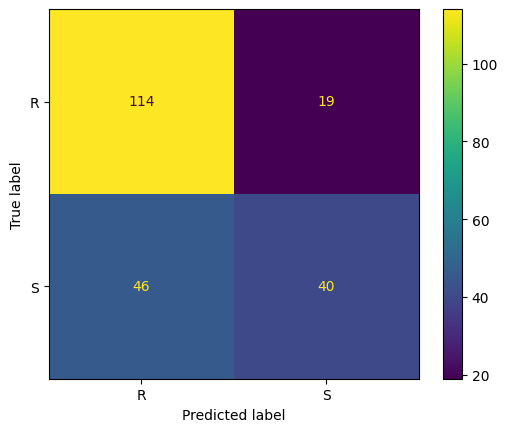

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7072 - loss: 0.6364 
Results
Accuracy: 0.7031963467597961
R recall: 0.8571428571428571
S recall: 0.46511627906976744
R precision: 0.7125
S precision: 0.6779661016949152


In [ ]:
# implementing the evaluate() function
Model_Report = evaluate(NN_AMX_GY_model,AMX_GY_test_df, AMX_Train_test_dic['labels_test'],AMX_GY_labels_pred)

### **8) Hyperparameter Tunning and Crossvalidation for NN model**


#### **a) Hyperparameter Tunning**

Neural Networks can have an overwhelming amount of hyperparameters we could configure. Some of them have to do with the overall architecture of the network, that is the number of layers and neurons in each layer. For simplicity in this tutorial we will only tune one of the hyperparameters that do not change the architechture, only learning parameters (learning rate, batch sizes or dropout rate, etc). In this example we will tune only 2 hyperparameters : the learning rate and the batch sizes.

In [ ]:
# Creating dictionary of parameters to tune.
hparam = {"lr":[0.0001, 0.001],
          "rate":[0.4, 0.8]}

#### **b) Crossvalidation**



In [ ]:
# Creating function to perform hyper parameter tunning of model
def NN_hp_tune(param, feat_train_df, lab_train, drug, combo, v=3, lr=0.0001, rate=0.8, cv=4):
  #Creating model and wrapping it under scikeras function for skit-lear compatibility
  NNmodel = KerasClassifier(model=run_NN, verbose=0, lr=lr, rate=rate,
                            feat_train_df = feat_train_df, lab_train=lab_train,
                            drug=drug, combo=combo, view_training = False)
  # performing the hyper parameter tunning using regular crossvalidation
  scoring_dic = {'f1_macro':make_scorer(f1_score , average='macro')}

  # Extracting features only from dataframe
  feat = feat_train_df.drop(columns=['MLST'])
  scaler = MinMaxScaler()
  feat_t = scaler.fit_transform(feat)
  # Chooosing crossvalidation scheme
  if str(cv).isnumeric():
    cv = KFold(cv)
    gs = GridSearchCV(NNmodel, hparam, scoring=scoring_dic,cv=cv, refit='f1_macro', verbose=v, return_train_score=True)
    gs.fit(feat_t, lab_train.to_numpy(dtype=float), verbose=0)
    print(gs.best_params_)
    print(gs.best_score_)
    K.clear_session()
    return gs.best_estimator_
  elif cv == "blocked":
    groups= feat_train_df['MLST']
    cv = StratifiedGroupKFold(n_splits=4)
    gs = GridSearchCV(NNmodel, hparam , scoring=scoring_dic, cv=cv, refit='f1_macro', verbose=v, return_train_score=True)
    gs.fit(feat_t, lab_train.to_numpy(dtype=float), verbose=0, groups=groups)
    print(gs.best_params_)
    print(gs.best_score_)
    K.clear_session()
    return gs.best_estimator_
  else:
    print("Please input for cv argument 'blocked' or an integer")


In [ ]:
# Running the function created (takes longer time)
NN_AMX_GY_best_model = NN_hp_tune(hparam, AMX_GY_train_df, AMX_Train_test_dic['labels_train'], drug='AMX', combo='GY', cv=4)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
AMX Training combo: GY
[CV 1/4] END lr=0.0001, rate=0.4; f1_macro: (train=0.828, test=0.823) total time=  13.3s
AMX Training combo: GY
[CV 2/4] END lr=0.0001, rate=0.4; f1_macro: (train=0.824, test=0.863) total time=  13.4s
AMX Training combo: GY
[CV 3/4] END lr=0.0001, rate=0.4; f1_macro: (train=0.846, test=0.806) total time=  12.8s
AMX Training combo: GY
[CV 4/4] END lr=0.0001, rate=0.4; f1_macro: (train=0.841, test=0.742) total time=  10.9s
AMX Training combo: GY
[CV 1/4] END lr=0.0001, rate=0.8; f1_macro: (train=0.653, test=0.619) total time=  11.6s
AMX Training combo: GY
[CV 2/4] END lr=0.0001, rate=0.8; f1_macro: (train=0.566, test=0.605) total time=  12.1s
AMX Training combo: GY
[CV 3/4] END lr=0.0001, rate=0.8; f1_macro: (train=0.580, test=0.519) total time=  12.6s
AMX Training combo: GY
[CV 4/4] END lr=0.0001, rate=0.8; f1_macro: (train=0.691, test=0.642) total time=  12.3s
AMX Training combo: GY
[CV 1/4] END lr=0.001

### **9) Use all functions and evaluate every drug in every feature combination!**
**NOTE:** Code below is the same as in previous notebook. Hyperparameter tunning of neural networks are very computer resource heavy, due to lack of more RAM (12GB) in the Google Colab environment we have performed the code below already by parts and provided you a CSV file already with the results. If you have access to more RAM in a paid version of Colab or a google cloud environment feel free to run the code below!

#### **a) Lets recall the list of drugs we have available and the combination of features we are interested in**

In [ ]:
# let's check all drugs
print(drug_list[9:13])

# let's see all combinations we are interested in
print(combo_list)


Index(['TBM', 'TMP', 'CIP'], dtype='object')
['Y', 'G', 'GY']


#### **b) Create a loop that will go through all our functions using the lists above**

In [ ]:
for fname in os.listdir(filepath):
    if fname.endswith('NN_metrics_df.csv'):
        print("A csv with stored results for XGBoost has already been created. Please check your Google Drive directory.")
        break
else:
  # Lets use all our functions this time and save our report into a single data structure
  NN_model_metrics = {}

  for drug in drug_list[9:12]:
    print(drug)
    Test_Train_dic = Split_train_test(drug) # splits each drug df into a dictionary with testing and training data
    for combo in combo_list:
      # Training each drug_combo features
      labels_train = Test_Train_dic["labels_train"]
      features_train = combo_feat(Test_Train_dic["features_train"], drug, combo) # create corresponding feature_df for training
      NN_combo_tunned_model = NN_hp_tune(hparam, features_train, labels_train, v=3, drug=drug, combo=combo) # crossvalidated best model

      # Predicting each drug_combo features
      features_test = combo_feat(Test_Train_dic["features_test"], drug, combo) # create corresponding feature_df for testing
      labels_pred = predict(NN_combo_tunned_model, features_test) # generate predictions based on the feature combination tested

      # Evaluating our models
      labels_test = Test_Train_dic["labels_test"]
      report = evaluate(NN_combo_tunned_model,features_test, labels_test, labels_pred, cf=False, show_results= False, tunned=True)
      NN_model_metrics[drug+"_"+combo] = report

      print(report)
      K.clear_session()
    # convert dictionary into a dataframe
  NN_metrics = pd.DataFrame.from_dict(NN_model_metrics, orient='index',columns=["Accuracy", "R_recall", "S_recall", "R_precision", "S_precision"]).reset_index()
  NN_metrics = NN_metrics.rename(columns = {'index':'Drug_combo'})

  # saving our metric results into a CSV file
  NN_metrics.to_csv(filepath+"NN_metrics_df_part4.csv", index= False)

TBM
Fitting 4 folds for each of 4 candidates, totalling 16 fits
TBM Training combo: Y
[CV 1/4] END lr=0.0001, rate=0.4; f1_macro: (train=0.412, test=0.419) total time=   3.3s
TBM Training combo: Y
[CV 2/4] END lr=0.0001, rate=0.4; f1_macro: (train=0.413, test=0.414) total time=   5.2s
TBM Training combo: Y
[CV 3/4] END lr=0.0001, rate=0.4; f1_macro: (train=0.410, test=0.424) total time=   3.2s
TBM Training combo: Y
[CV 4/4] END lr=0.0001, rate=0.4; f1_macro: (train=0.419, test=0.395) total time=   3.3s
TBM Training combo: Y
[CV 1/4] END lr=0.0001, rate=0.8; f1_macro: (train=0.412, test=0.419) total time=   3.4s
TBM Training combo: Y
[CV 2/4] END lr=0.0001, rate=0.8; f1_macro: (train=0.413, test=0.414) total time=   4.8s
TBM Training combo: Y
[CV 3/4] END lr=0.0001, rate=0.8; f1_macro: (train=0.410, test=0.424) total time=   3.3s
TBM Training combo: Y
[CV 4/4] END lr=0.0001, rate=0.8; f1_macro: (train=0.419, test=0.395) total time=   3.7s
TBM Training combo: Y
[CV 1/4] END lr=0.001, rat

Congratulations for making it this far! We have finally finished creating all our Machine Learning Models and saved the results in different dataframes. Our [Last Notebook](https://colab.research.google.com/drive/1MmiXXJZ1QTK3gTwTK7XN0VZnse3NL8Gh?usp=sharing) will now create a graph that will help us pick the best results for each of our antibiotics.